<a href="https://colab.research.google.com/github/mcalmeida13/math-machine-learning/blob/main/linear-regression/l1_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Which features have highest impact on the target?

In [2]:
#  Number of data points
N = 50

# Dimensionality (Number of features is too large, it is a fat matrix or dataset)
D = 50

Means you have few data and tons of features

In [5]:
# uniformly distributed numbers between -5, +5
X = (np.random.random((N, D)) - 0.5)*10

In [7]:
# true weights - only the first 3 dimensions of X affect Y
true_w = np.array([1, 0.5, -0.5] + [0]*(D - 3))
true_w

array([ 1. ,  0.5, -0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [9]:
# generate Y - add noise
Y = X.dot(true_w) + np.random.randn(N)*0.5
Y

array([-3.3406525 ,  2.38741165,  0.3852915 ,  7.01098436, -0.07947238,
        0.88694543, -2.72982736,  3.25475965, -6.7685663 ,  3.20984681,
        0.09557647,  1.06559543, -0.82042386, -7.22360267, -3.89115211,
        2.76786108, -3.17659563,  0.17407191,  3.61355921, -3.75930524,
       -7.13905949, -2.66216705,  2.6816872 , -1.30878638,  7.58490298,
       -3.40584485,  3.68939132, -2.39860777, -2.06075385,  1.68333903,
        3.82279173,  0.8613941 , -1.21197211,  2.79603465, -1.41651286,
        2.33442906, -0.27363616, -2.51671551, -0.81384486, -3.82096489,
        2.01309448,  5.53776981,  5.49507598,  4.09740266,  3.18999728,
       -3.18364165, -1.20858532,  7.85814901,  2.26785448,  2.76157264])

In [10]:
# perform gradient descent to find w
costs = [] # keep track of squared error cost
w = np.random.randn(D) / np.sqrt(D) # randomly initialize w
learning_rate = 0.001
l1 = 10.0 # Also try 5.0, 2.0, 1.0, 0.1 - what effect does it have on w?

for t in range(500):
  # update w
  Yhat = X.dot(w)
  delta = Yhat - Y
  w -= learning_rate*(X.T.dot(delta) + l1*np.sign(w))

  # find and store the cost
  mse = delta.dot(delta) / N
  costs.append(mse)

In [17]:
print("final w:", np.around(w, decimals=3))

final w: [ 0.932  0.489 -0.437  0.011 -0.008 -0.015 -0.025  0.024  0.01  -0.004
  0.016  0.036  0.028  0.031  0.003  0.035  0.01   0.006 -0.001 -0.01
  0.026  0.01   0.004 -0.001  0.007 -0.037 -0.007 -0.009  0.013 -0.009
 -0.001 -0.023  0.019 -0.007 -0.016  0.034 -0.003  0.009 -0.003  0.017
 -0.002  0.028 -0.001 -0.043 -0.009  0.02  -0.002 -0.02   0.001  0.001]


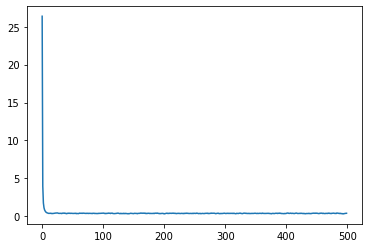

In [12]:
# plot the costs
plt.plot(costs)
plt.show()

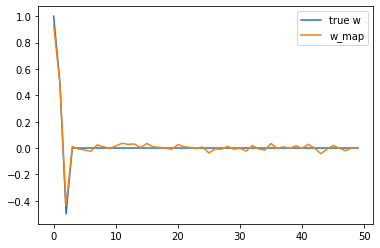

In [13]:
# plot our w vs true w
plt.plot(true_w, label='true w')
plt.plot(w, label='w_map')
plt.legend()
plt.show()

# Comments about L1 and L2 regularization

**Similarities:**
  - Both help you prevent overffiting
  - L1: choose the most important features
  - L2: deal well with outliars, making the assertion that none of the weight are extremely large

**Differences**
- L1: deals with dataset with small number of data and large number of features. Encourages a sparse solution
- L2: deals with data with outliars. Encourages small weights
